Spectral analysis of the $\boldsymbol{\mathcal{L}}(\eta)$ operator
==

In [1]:
%matplotlib inline

from mushi.ksfs import kSFS
import mushi.histories as hst
from mushi import utils

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from numpy.linalg import cond, svd
from matplotlib.colors import LogNorm

set this to e.g. your Downloads folder path if you want plots saved to pdfs

In [2]:
plot_dir = None

mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

### define $\eta(t)$

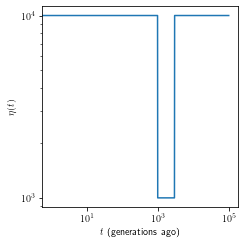

In [3]:
# time grid
t = np.concatenate(([0], np.logspace(0, 5, 1000), [np.inf]))
# η(t) values in each epoch
y = 1e4 * np.ones(len(t) - 1)
y[np.less(1000, t[:-1]) & np.less(t[:-1], 3000)] = 1e3
# histories object
eta = hst.eta(t[1:-1], y)

plt.figure(figsize=(3.5, 3.5))
eta.plot()
plt.show()

### Singular value spectrum of $\mathbf{L}(\mathbf y)$ with $n=200$

In [5]:
n = 200
L = utils.C(n) @ utils.M(n, t, y)
U, σ, Vh = svd(L, full_matrices=False)

### Top few right singular vectors

In [6]:
df = pd.DataFrame(Vh.T, index=pd.Index(t[:-1], name='time'))
df = df.melt().set_index('variable')
df['singular value'] = σ[df.index]
df['$t$ (generations ago)'] = np.tile(t[:-1], df.index[-1] + 1)

# filter to top few singular values
keep = 20
df = df[(df.index % 1 == 0) & (df.index < keep)]

palette = sns.color_palette("coolwarm", n_colors=df['singular value'].nunique())

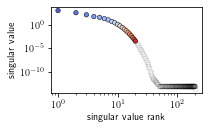

In [7]:
x = np.arange(1, min(n, eta.m + 1))
plt.figure(figsize=(3, 1.9))
plt.scatter(x[:keep], σ[:keep], c=palette, edgecolors='k', linewidths=.5, s=20)
plt.plot(x[keep:], σ[keep:], 'ko', ms=5, mfc='none', mew=.1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('singular value rank')
plt.ylabel('singular value')
plt.tight_layout()
if plot_dir:
    plt.savefig(f'{plot_dir}/L.svs.pdf')
plt.show()

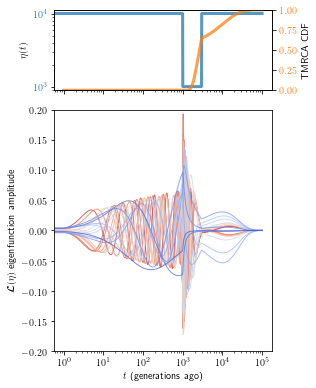

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex='col', figsize=(4.5, 5.5), gridspec_kw={'height_ratios': [1, 3]})
plt.sca(axes[0])
eta.plot(lw=3, alpha=0.75)
plt.tick_params(axis='y', labelcolor='C0')
plt.xlabel('')
ax2 = axes[0].twinx()
plt.sca(ax2)
plt.plot(eta.change_points, kSFS(n=n).tmrca_cdf(eta), color='C1', lw=3, alpha=0.75)
plt.ylim([0, 1])
plt.ylabel('TMRCA CDF')
plt.tick_params(axis='y', labelcolor='C1')
plt.sca(axes[1])
ax = sns.lineplot(x=r'$t$ (generations ago)', y='value', hue='singular value', units='singular value',
                  data=df, estimator=None,
                  palette=palette[::-1],
                  legend=False, alpha=.75, lw=1)
plt.ylabel(r'$\boldsymbol{\mathcal{L}}(\eta)$ eigenfunction amplitude')
plt.xscale('log')
plt.ylim([-.2, .2])
plt.tight_layout()
if plot_dir:
    plt.savefig(f'{plot_dir}/L.pdf')
plt.show()